In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import re

## Edit title

In [79]:
cancer_data = pd.read_excel('../../data/cancer_data.xls')
cancer_info = pd.read_excel('../../data/cancer_info.xlsx')

title_dic = cancer_info.groupby('变量名')['变量名缩写'].apply(list).to_dict()
for k, v in title_dic.items():
    cancer_data.rename(columns={k:v[0]}, inplace=True)
cancer_data.replace('UN', np.nan, inplace=True)

cancer_data.to_csv('../../data/cancer_data.csv', index=False)

## Process error value

In [121]:
cancer_data = pd.read_csv('../../data/cancer_data.csv')
for i in cancer_data.columns:
    cancer_data[i] = cancer_data[i].apply(lambda x: np.nan if isinstance(x, str) and x[0] in ['>','<'] else x)

C:\Users\Chi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,34,50,66,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
cancer_data.columns

Index(['ID', 'A=Case, B=Control', 'Origin', 'A=male B=female', 'Age',
       'Pattern', 'TNM', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP'],
      dtype='object')

In [126]:
for i in ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP']:
    cancer_data[i] = cancer_data[i].astype('float')

In [127]:
cancer_data.to_csv('../../data/cancer_data_v2.csv', index=False)

## File description: change the data type as float.

In [552]:
cancer_data2 = pd.read_csv('../../data/cancer_data_v2.csv')
cancer_data2

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,TNM,Smoke,RBC,HGB,...,Ca,Mg,P,T-CEA,T-CA199,T-CA125,T-CYFRA21-1,T-NSE,T-ESR,T-CRP
0,1,A,A,B,41,A,NaN,0.0,3.78,122.0,...,2.16,0.90,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,A,A,A,35,A,NaN,0.0,5.53,169.0,...,NaN,NaN,NaN,NaN,NaN,31.89,8.43,12.92,NaN,NaN
2,1000,A,A,A,50,A,NaN,0.0,4.04,120.0,...,1.99,0.86,0.98,3.33,42.15,49.91,3.61,11.05,40.0,35.7
3,1004,A,A,A,51,A,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,A,A,B,49,A,NaN,0.0,4.04,118.0,...,NaN,NaN,NaN,33.34,213.70,141.20,12.69,NaN,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,NaN,25.0,4.96,161.0,...,NaN,NaN,NaN,1.34,10.90,12.80,NaN,NaN,NaN,NaN
8741,2491728,B,C,A,48,O,NaN,0.0,5.35,174.0,...,2.12,0.90,0.74,0.97,20.91,8.24,NaN,NaN,NaN,NaN
8742,2491799,B,C,A,56,O,NaN,0.0,6.36,129.0,...,NaN,NaN,NaN,1.38,6.93,8.92,NaN,NaN,NaN,NaN
8743,509610,B,C,B,59,O,NaN,25.0,5.03,147.0,...,2.42,0.89,1.06,3.88,23.20,NaN,NaN,NaN,NaN,NaN


# ------------------------暂时无用---------------------------

In [ ]:
def scren_nan(df, row, column):
    
    
    # keep the left part
    samples_nan_rate = dict(df.isnull().sum(axis=1)/df.shape[1] < row)
    features_nan_rate = dict(df.isnull().sum(axis=0)/df.shape[0] < column)
    
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    
    return df.T[samples_to_select].T[features_to_select]

# 打印缺失比例表

In [553]:
feature2delete = pd.read_csv('../../data/AB组缺失step1.csv', index_col=0)
feature2delete = feature2delete[feature2delete['Delete'] == 'Y'].index

In [100]:
def missing_ratio(df):
    group_a = df[df['A=Case, B=Control'] == 'A']
    group_b = df[df['A=Case, B=Control'] == 'B']
    features_nan_rate_a = group_a.isnull().sum(axis=0)/group_a.shape[0]
    features_nan_rate_b = group_b.isnull().sum(axis=0)/group_b.shape[0]

    columns_info = pd.concat([features_nan_rate_a, features_nan_rate_b], axis=1)
    columns_info.columns = ['A', 'B']
    return columns_info

In [124]:
def feature_comparison(group1, group2, features, info):
    fig_size_x = 4
    fig_size_y = (len(features) // fig_size_x) + 1
    plt.figure(dpi=100, figsize=(fig_size_x*2, fig_size_y*2))
    num = 1
    for feature in features:
        plt.subplot(fig_size_y, fig_size_x, num)
        plt.hist([group1[feature], group2[feature]], bins=50)
        plt.title(feature)
        num += 1
    plt.legend(['Case', 'Control'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    plt.savefig(info)
    plt.close()

In [554]:
cancer_data3 = cancer_data2.drop(feature2delete, axis=1)

# --------------------------------------------------

In [556]:
feature2delete2 = missing_ratio(cancer_data3)
feature2delete2

,A,B
ID,0.000000,0.000000
"A=Case, B=Control",0.000000,0.000000
Origin,0.000000,0.000000
A=male B=female,0.000000,0.000000
Age,0.000000,0.000000
...,...,...
T-CEA,0.314815,0.003414
T-CA199,0.628338,0.183858
T-CA125,0.572567,0.652280
T-CYFRA21-1,0.382429,0.448183


In [111]:
row_info = pd.DataFrame(columns=['MissingRate', 'A_left', 'B_left'])
for i in np.arange(0,1.05,0.05):
    samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < i)
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    cancer_data4 = cancer_data3.T[samples_to_select].T
    a = cancer_data4[cancer_data4['A=Case, B=Control'] == 'A'].shape[0]
    b = cancer_data4[cancer_data4['A=Case, B=Control'] == 'B'].shape[0]
    row_info = row_info.append(pd.DataFrame({'MissingRate':[i], 'A_left':[a], 'B_left':[b]}))

In [112]:
row_info

,MissingRate,A_left,B_left
0,0.00,0,0
0,0.05,2519,2481
0,0.10,3789,3738
0,0.15,3962,3796
0,0.20,3986,3796
0,0.25,4004,3796
0,0.30,4011,3796
0,0.35,4012,3796
0,0.40,4030,3796
0,0.45,4069,3798


In [101]:
columns_info.to_csv('../../data/AB组缺失比例.csv')

NameError: name 'columns_info' is not defined

In [84]:
# row_info.to_csv('../../data/AB组剩余样本数（By row）.csv', index=False)
# feature2delete2.to_csv('../../data/AB组缺失信息（After step1）.csv')

# 横轴缺失率0.2以上将被过滤

In [557]:
samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < 0.2)
samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
cancer_data4 = cancer_data3.T[samples_to_select].T

In [558]:
cancer_data4

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,Smoke,RBC,HGB,HCT,...,ALP,GGT,CK,LDH-L,HBDH,T-CEA,T-CA199,T-CA125,T-CYFRA21-1,T-NSE
0,1,A,A,B,41,A,0,3.78,122,0.37,...,47,11,38,156,118,NaN,NaN,NaN,NaN,NaN
1,100,A,A,A,35,A,0,5.53,169,0.52,...,43,30,23,191,159,NaN,NaN,31.89,8.43,12.92
2,1000,A,A,A,50,A,0,4.04,120,0.38,...,66,17,60,211,166,3.33,42.15,49.91,3.61,11.05
5,1007,A,A,B,50,A,200,4.14,131,0.38,...,58,13,64,227,173,0.76,23.76,19.72,2.96,8.4
6,1008,A,A,A,51,A,400,4.54,139,0.41,...,88,31,51,159,146,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,25,4.96,161,0.48,...,94,49,96,159,119,1.34,10.9,12.8,NaN,NaN
8741,2491728,B,C,A,48,O,0,5.35,174,0.51,...,60,65,76,164,129,0.97,20.91,8.24,NaN,NaN
8742,2491799,B,C,A,56,O,0,6.36,129,0.4,...,124,16,38,128,112,1.38,6.93,8.92,NaN,NaN
8743,509610,B,C,B,59,O,25,5.03,147,0.47,...,71,28,129,273,232,3.88,23.2,NaN,NaN,NaN


In [102]:
column_info = pd.DataFrame(columns=['MissingRate', 'Feature_left', 'Feature_screened'])
for i in np.arange(0,1.05,0.05):
    features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < i)
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    features_be_screened = [k for k, v in features_nan_rate.items() if str(v)=="False"]
    cancer_data5 = cancer_data4[features_to_select]
    column_info = column_info.append(pd.DataFrame({'MissingRate':[i], 'Feature_left':[cancer_data5.shape[1]], 'Feature_screeded':[features_be_screened]}))

In [103]:
# column_info.to_csv('../../data/剩余特征数.csv', index=False)

# 纵轴缺失率0.15以上将被过滤

In [559]:
features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < 0.15)
features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
cancer_data5 = cancer_data4[features_to_select]

In [560]:
cancer_data5

,ID,"A=Case, B=Control",Origin,A=male B=female,Age,Pattern,Smoke,RBC,HGB,HCT,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
0,1,A,A,B,41,A,0,3.78,122,0.37,...,0.53,3.86,1.99,1.67,47,11,38,156,118,NaN
1,100,A,A,A,35,A,0,5.53,169,0.52,...,1.23,6.6,2.49,3.85,43,30,23,191,159,NaN
2,1000,A,A,A,50,A,0,4.04,120,0.38,...,0.93,4.22,1.12,2.96,66,17,60,211,166,3.33
5,1007,A,A,B,50,A,200,4.14,131,0.38,...,1.76,3.97,1.47,2.2,58,13,64,227,173,0.76
6,1008,A,A,A,51,A,400,4.54,139,0.41,...,1.27,3.55,1.1,2.13,88,31,51,159,146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,2489054,B,C,A,60,O,25,4.96,161,0.48,...,1.82,5.39,1.35,3.4,94,49,96,159,119,1.34
8741,2491728,B,C,A,48,O,0,5.35,174,0.51,...,0.97,5.22,1.11,3.71,60,65,76,164,129,0.97
8742,2491799,B,C,A,56,O,0,6.36,129,0.4,...,1.19,5.91,1.39,4.03,124,16,38,128,112,1.38
8743,509610,B,C,B,59,O,25,5.03,147,0.47,...,0.71,5.39,1.83,2.88,71,28,129,273,232,3.88


In [561]:
cancer_data5.to_csv('../../data/cancer_data_v3.csv', index=False)

# 异常值处理

In [6]:
cancer_data = pd.read_csv('../../data/cancer_data_v3.csv')
cancer_data

,ID,"A=Case, B=Control",Origin,A=male B=female,Pattern,Age,Smoke,RBC,HGB,HCT,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
0,1,A,A,B,A,41,0.0,3.78,122.0,0.37,...,0.53,3.86,1.99,1.67,47.0,11.0,38.0,156.0,118.0,NaN
1,100,A,A,A,A,35,0.0,5.53,169.0,0.52,...,1.23,6.60,2.49,3.85,43.0,30.0,23.0,191.0,159.0,NaN
2,1000,A,A,A,A,50,0.0,4.04,120.0,0.38,...,0.93,4.22,1.12,2.96,66.0,17.0,60.0,211.0,166.0,3.33
3,1007,A,A,B,A,50,200.0,4.14,131.0,0.38,...,1.76,3.97,1.47,2.20,58.0,13.0,64.0,227.0,173.0,0.76
4,1008,A,A,A,A,51,400.0,4.54,139.0,0.41,...,1.27,3.55,1.10,2.13,88.0,31.0,51.0,159.0,146.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,2489054,B,C,A,O,60,25.0,4.96,161.0,0.48,...,1.82,5.39,1.35,3.40,94.0,49.0,96.0,159.0,119.0,1.34
7788,2491728,B,C,A,O,48,0.0,5.35,174.0,0.51,...,0.97,5.22,1.11,3.71,60.0,65.0,76.0,164.0,129.0,0.97
7789,2491799,B,C,A,O,56,0.0,6.36,129.0,0.40,...,1.19,5.91,1.39,4.03,124.0,16.0,38.0,128.0,112.0,1.38
7790,509610,B,C,B,O,59,25.0,5.03,147.0,0.47,...,0.71,5.39,1.83,2.88,71.0,28.0,129.0,273.0,232.0,3.88


In [28]:
def stat_info(df, fea):
    a = df[df['A=Case, B=Control']=='A'][fea]    
    b = df[df['A=Case, B=Control']=='B'][fea]
    print(f'{fea}:\tCase\tControl')
    print(f'Null:\t{a.isnull().values.any()}\t{b.isnull().values.any()}')
    a.dropna(inplace=True)
    b.dropna(inplace=True)
    print(f'均值:\t{a.mean()}\t{b.mean()}')
    print(f'方差:\t{a.std()}\t{b.std()}')
    print(f'Max:\t{a.max()}\t{b.max()}')
    print(f'上四分位:\t{a.quantile(0.75)}\t{b.quantile(0.75)}')
    print(f'中位数:\t{a.median()}\t{b.median()}')
    print(f'下四分位:\t{a.quantile(0.25)}\t{b.quantile(0.25)}')
    print(f'Min:\t{a.min()}\t{b.min()}')
    print(f'偏度:\t{a.skew()}\t{b.skew()}')
    print(f'峰度:\t{a.kurt()}\t{b.kurt()}')
    print(f'P值:\t{ss.ttest_ind(a, b)[1]}')
    plt.hist([a,b], bins=50)
    plt.legend(['Case','Control'])
    plt.show()

Smoke:	Case	Control
Null:	True	True
均值:	366.19723092998953	3.0345718901453957
方差:	466.21834795777227	13.099382696239665
Max:	2700.0	100.0
上四分位:	600.0	0.0
中位数:	120.0	0.0
下四分位:	0.0	0.0
Min:	0.0	0.0
偏度:	1.3589667312955673	5.557262909874343
峰度:	1.7597153872976303	33.96604264366517
P值:	0.0


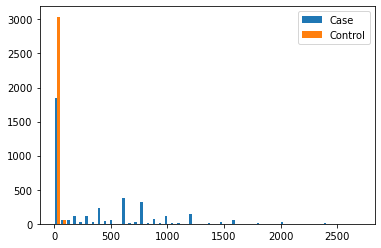

In [29]:
stat_info(cancer_data, 'Smoke')

## 处理Nan: 中位数填充，依照依照年龄，是否患病，性别分别填充

In [569]:
for fea in cancer_data.columns[6:]:
    median = cancer_data.groupby(['A=Case, B=Control', 'A=male B=female', 'Age'])[fea].median()
    cancer_data.set_index(['A=Case, B=Control', 'A=male B=female', 'Age'], inplace=True)
    cancer_data[fea].fillna(median, inplace=True)
    cancer_data.reset_index(inplace=True)

## 处理异常值：3倍（上四分位-下四分位）

In [4]:
def interval(df, fea):
    a_m = df[np.logical_and(list(df['A=Case, B=Control']=='A'), list(df['A=male B=female']=='A'))][fea]
    a_f = df[np.logical_and(list(df['A=Case, B=Control']=='A'), list(df['A=male B=female']=='B'))][fea]
    b_m = df[np.logical_and(list(df['A=Case, B=Control']=='B'), list(df['A=male B=female']=='A'))][fea]
    b_f = df[np.logical_and(list(df['A=Case, B=Control']=='B'), list(df['A=male B=female']=='B'))][fea]
    a_m = a_m.apply(lambda x: np.nan if x > 3*(a_m.quantile(0.75)-a_m.quantile(0.25))+a_m.quantile(0.75) or x < -3*(a_m.quantile(0.75)-a_m.quantile(0.25))+a_m.quantile(0.25) else x)
    a_f = a_f.apply(lambda x: np.nan if x > 3*(a_f.quantile(0.75)-a_f.quantile(0.25))+a_f.quantile(0.75) or x < -3*(a_f.quantile(0.75)-a_f.quantile(0.25))+a_f.quantile(0.25) else x)
    b_m = b_m.apply(lambda x: np.nan if x > 3*(b_m.quantile(0.75)-b_m.quantile(0.25))+b_m.quantile(0.75) or x < -3*(b_m.quantile(0.75)-b_m.quantile(0.25))+b_m.quantile(0.25) else x)
    b_f = b_f.apply(lambda x: np.nan if x > 3*(b_f.quantile(0.75)-b_f.quantile(0.25))+b_f.quantile(0.75) or x < -3*(b_f.quantile(0.75)-b_f.quantile(0.25))+b_f.quantile(0.25) else x)
    new = pd.concat([a_m,a_f,b_m,b_f], axis=0)
    return new.sort_index()

In [8]:
%%time
for f in cancer_data.columns[6:]:
    cancer_data[f] = interval(cancer_data, f)
    print(f)

Smoke
RBC
HGB
HCT
MCV 
MCH
MCHC 
RDW-CV
RDW-SD
PLT
WBC
NEUT%
LYM%
MONO%
EO%
BASO%
NEUT
LYMPH
MONO
EO
BASO
TBIL
DBIL
IBIL
ALT
AST
AST:ALT
TP
ALB
GLO
A/G
GLU
BUN
Cr
Cystatin-C
UA
TG
TCH
HDL-C
LDL-C
ALP
GGT
CK
LDH-L
HBDH
T-CEA
Wall time: 18min 57s


GGT:	Case	Control
Null:	True	True
均值:	31.922375033060035	30.115395207931698
方差:	23.62009302290391	18.952867808961983
Max:	143.0	115.0
上四分位:	40.0	37.0
中位数:	24.0	24.0
下四分位:	16.0	17.0
Min:	2.57	5.0
偏度:	1.8687076300745928	1.7210561113636147
峰度:	3.839551422507468	3.2745513927377754
P值:	0.00029234958898625285


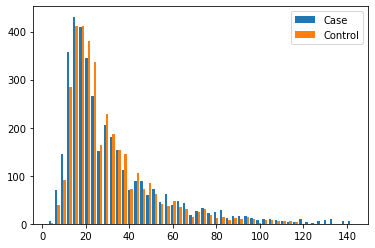

In [37]:
stat_info(cancer_data, 'GGT')

## 对移除异常值后的AB组做t检验

In [34]:
a = cancer_data[cancer_data['A=Case, B=Control']=='A']
b = cancer_data[cancer_data['A=Case, B=Control']=='B']
dif_fea = []
for i in cancer_data.columns[6:]:
    p_val = ss.ttest_ind(a[i].dropna(), b[i].dropna())[1]
    if p_val<0.05:
        dif_fea.append(i)
    if p_val>0.05:
        print(i)

MONO%
AST


## 替换异常值后得到V4